## __Import__

In [1]:
import sys
import os
import pandas as pd
import numpy as np
from ast import literal_eval
from mplsoccer import Pitch, VerticalPitch, Standardizer


# Run the notebook from inside the notebooks folder
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__name__), '..')))

from scripts.dataloader import Dataloader

dataloader = Dataloader()
dataloader.load_data()

[2025-08-15 17:46:12] Loading raw event data from local file system


,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,goalkeeper_lost_out,goalkeeper_success_in_play,shot_follows_dribble,half_start_late_video_start,player_off_permanent,goalkeeper_lost_in_play,half_end_early_video_end,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post,pass_backheel
0,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
1,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
2,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
3,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
4,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391333,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
6391334,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
6391335,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None
6391336,NaN,<NA>,<NA>,None,<NA>,NaN,None,None,None,<NA>,...,<NA>,<NA>,<NA>,<NA>,None,None,None,None,None,None


## Investigate heatmaps

__load data__

In [105]:
def convert_to_list(input_data):
    if(isinstance(input_data, str)):
        try:
            return literal_eval(input_data)
        except (ValueError, SyntaxError):
            print(f"Error: The string {input_data} could not be converted to a list.")
            return None
    
    return input_data

df_event_data = dataloader.get_data()
df_event_data = df_event_data.loc[(df_event_data["type"]=="Carry") | ((df_event_data["type"]=="Pass")), ["player", "player_id","location","type"]]
df_event_data["location"] = df_event_data["location"].apply(convert_to_list)
df_event_data[["x", "y"]] = df_event_data["location"].apply(pd.Series)
df_event_data = df_event_data.set_index("player_id")
df_event_data.head()

,player,player_id,location,type,x,y
2165,Andrej Kramarić,5460.0,"[60.2, 37.9]",Carry,60.2,37.9
2166,Sebastian Rudy,6039.0,"[53.9, 42.1]",Carry,53.9,42.1
2167,Fabian Lukas Schär,5537.0,"[34.3, 62.0]",Carry,34.3,62.0
2168,Tobias Strobl,12321.0,"[37.5, 23.7]",Carry,37.5,23.7
2169,Ermin Bičakčić,9396.0,"[36.7, 35.5]",Carry,36.7,35.5


__merge data__

In [188]:
df_standard_stats = pd.read_csv("../../data/new_approach/standard_stats_all_test.csv")
df_standard_stats =  df_standard_stats.loc[(df_standard_stats["match_played"]>=2) & (df_standard_stats["minutes_played"]>=90), : ].copy()#filter_df(df, match_played=match_played, minutes_played=minutes_played)
df_standard_stats = df_standard_stats.set_index("player_id")

df_combined = pd.merge(
    left=df_event_data, 
    right=df_standard_stats[["position_level_0", "position_level_1", "position_level_2"]], 
    left_index=True, 
    right_index=True, 
    how="left"
)
df_combined = df_combined[df_combined["position_level_0"].notna()]
df_combined

,player,location,type,x,y,position_level_0,position_level_1,position_level_2
player_id,,,,,,,,
5460.0,Andrej Kramarić,"[60.2, 37.9]",Carry,60.2,37.9,Forward,Central Midfielder,Left Center Midfield
6039.0,Sebastian Rudy,"[53.9, 42.1]",Carry,53.9,42.1,Midfielder,Defensive Midfielder,Left Defensive Midfield
5537.0,Fabian Lukas Schär,"[34.3, 62.0]",Carry,34.3,62.0,Defender,Regular Defender,Left Center Back
12321.0,Tobias Strobl,"[37.5, 23.7]",Carry,37.5,23.7,Midfielder,Central Midfielder,Right Center Midfield
9396.0,Ermin Bičakčić,"[36.7, 35.5]",Carry,36.7,35.5,Defender,Striker,Right Center Forward
...,...,...,...,...,...,...,...,...
6991.0,Etrit Berisha,"[7.9, 44.3]",Carry,7.9,44.3,Goalkeeper,Goalkeeper,Goalkeeper
8443.0,Dušan Basta,"[25.7, 71.2]",Carry,25.7,71.2,Defender,Offensive Defender,Right Back
22828.0,Ricardo Kishna,"[59.3, 72.4]",Carry,59.3,72.4,Forward,Winger,Left Wing


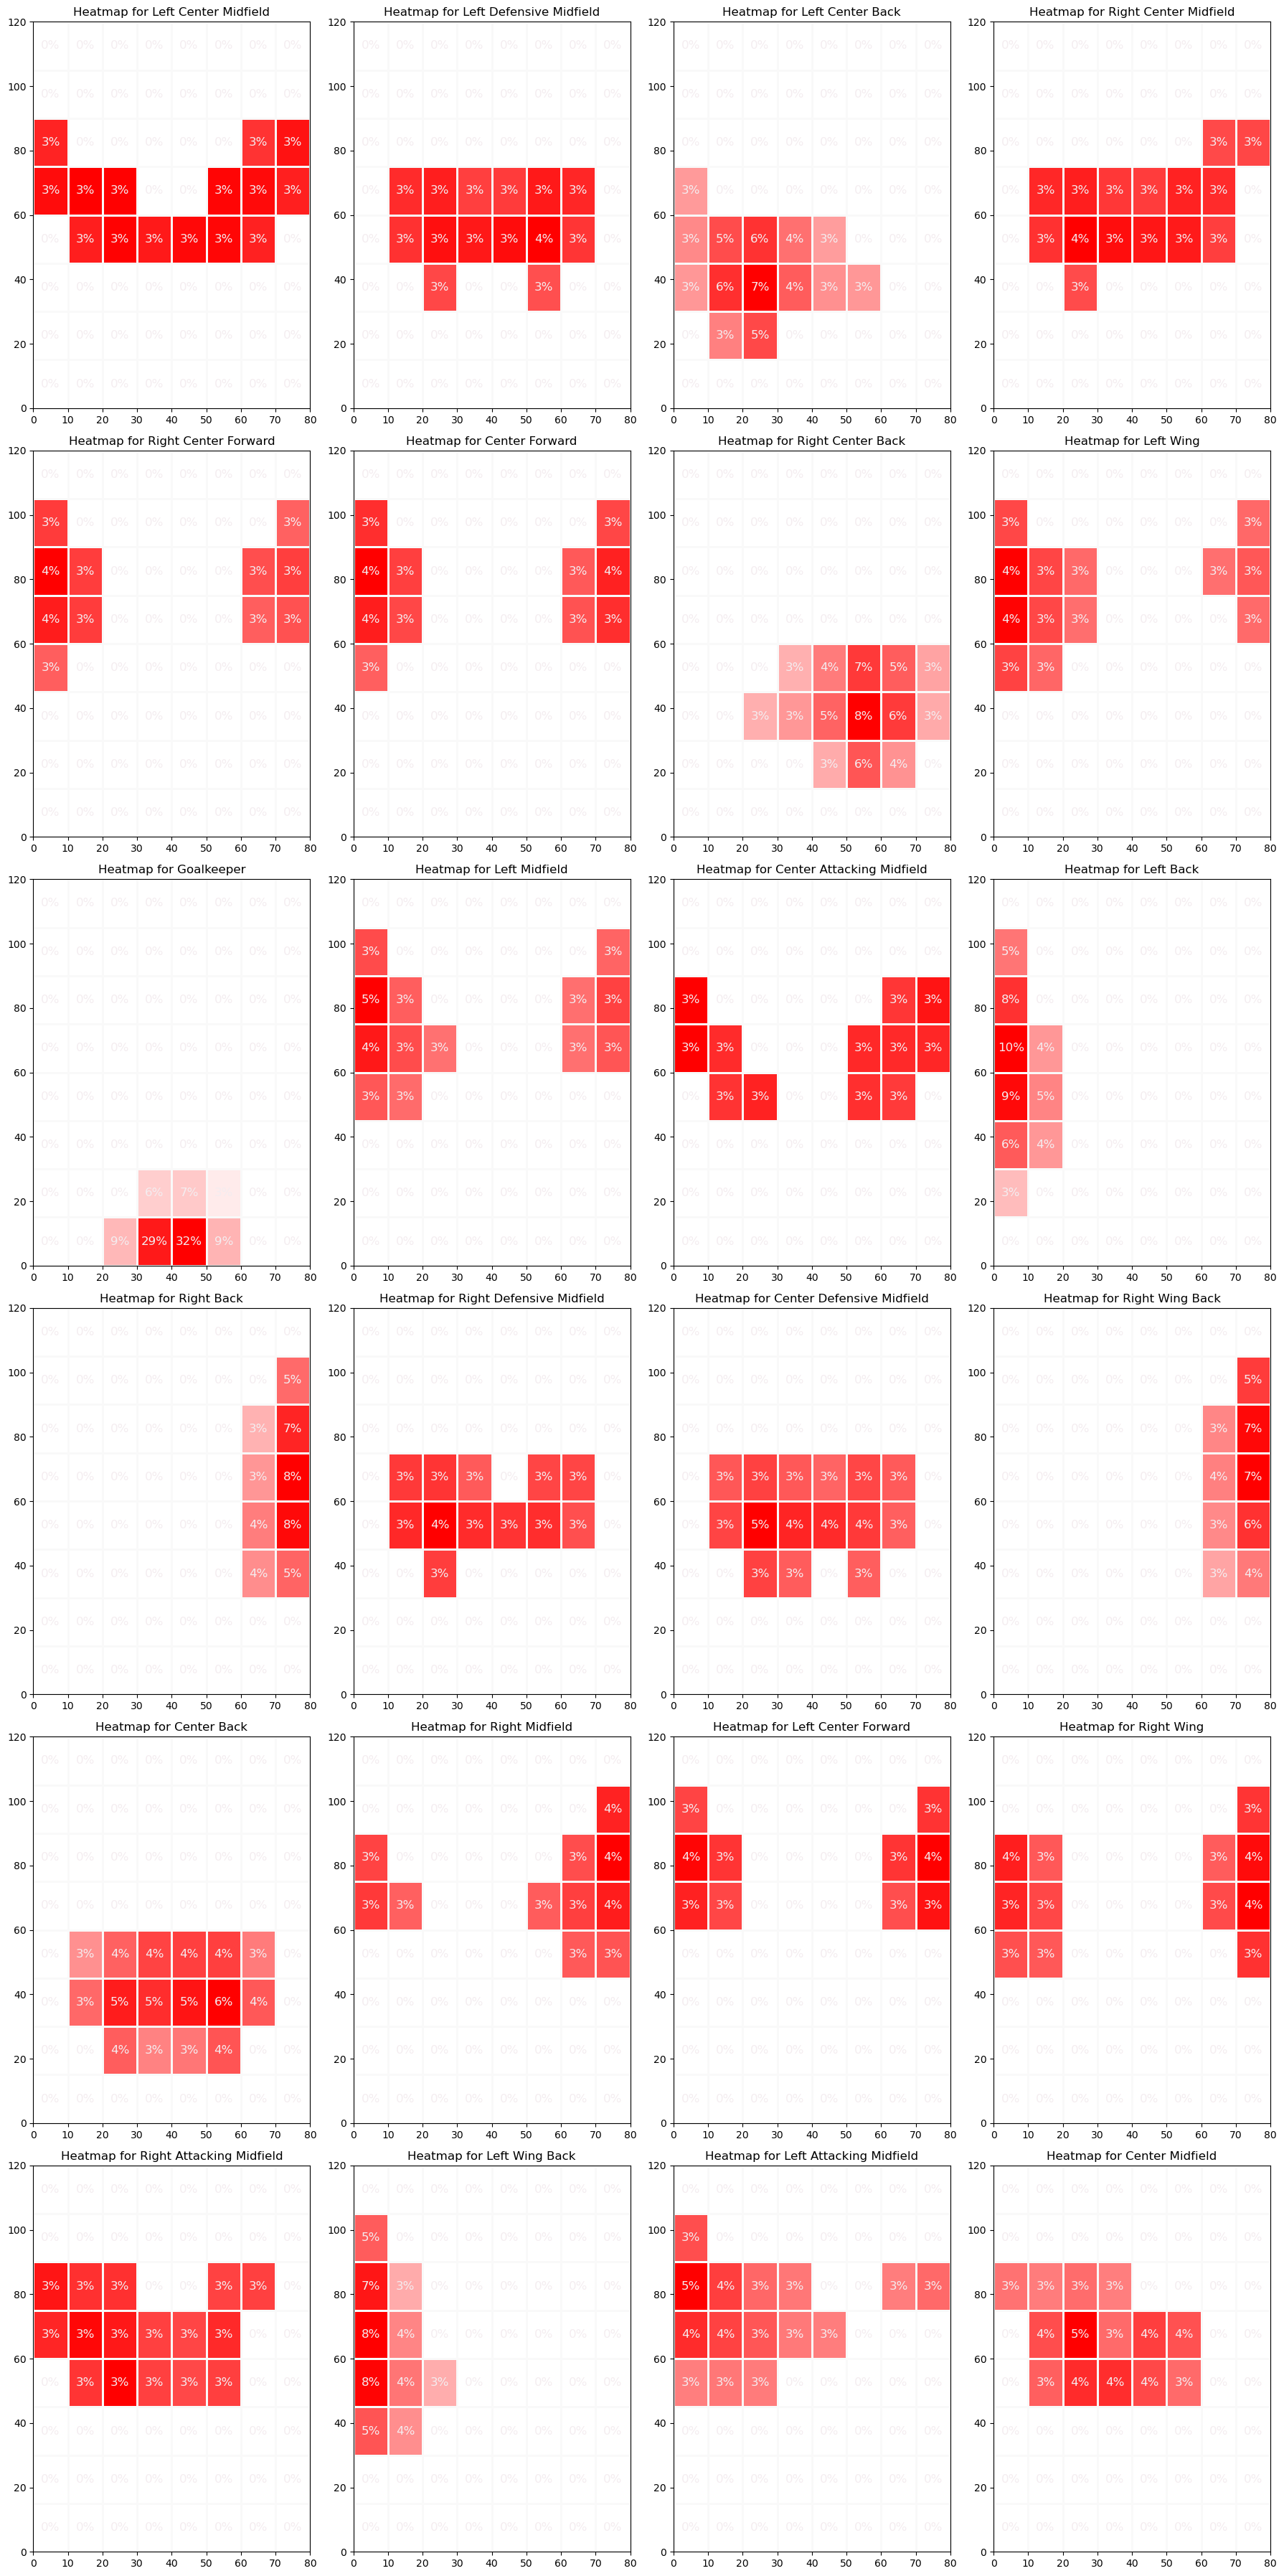

In [194]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

level = "position_level_2"

# define pitch for heatmap
pitch = VerticalPitch(positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2')

# calculate heatmap bin statistic
unique_positions = df_combined[level].unique()
n_positions = len(unique_positions)
n_rows = (n_positions + 3) // 4  # Calculate the number of rows needed (4 per row)

fig, axes = plt.subplots(n_rows, 4, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate over unique position_level_0 values and plot heatmaps
for i, position in enumerate(unique_positions):
    df_temp = df_combined[df_combined[level] == position]
    bin_statistic = pitch.bin_statistic(df_temp["x"], df_temp["y"], statistic='count', bins=(8, 8), normalize=True) # 1.) 8,8, 0.025; 2.) 16,12, 0.0099
    bin_statistic["statistic"] = np.where(bin_statistic["statistic"] <= 0.025, 0, bin_statistic["statistic"])

    # Create heatmap for each position
    cmap = LinearSegmentedColormap.from_list("white_to_red", ["#ffffff", "#ff0000"])
    pitch.heatmap(bin_statistic, ax=axes[i], cmap=cmap, edgecolor='#f9f9f9')
    pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=12, ax=axes[i], ha='center', va='center', str_format='{:.0%}')
    axes[i].set_title(f"Heatmap for {position}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Generate Heatamp based on Cut-Offs

In [190]:
from tqdm import tqdm
list_of_dfs = []
player_list = df_combined["player"].unique()
for player in tqdm(player_list):
    player_df = df_combined.loc[df_combined["player"] == player, ["x", "y"]]
    player_id = player_df.reset_index()["player_id"].iloc[0]
    bin_statistic = pitch.bin_statistic(player_df["x"], player_df["y"], statistic='count', bins=(8, 8), normalize=True) # 8,8, 0.025
    bin_statistic["statistic"] = np.where(bin_statistic["statistic"] < 0.025, 0, bin_statistic["statistic"])
    bin_stastistic_1d = bin_statistic['statistic'].flatten()
    list_of_dfs.append(
        pd.DataFrame([bin_stastistic_1d], columns=[f"bin {i+1}" for i in range(len(bin_stastistic_1d))], index=[player_id])
    )
    # print(pd.DataFrame([bin_stastistic_1d], columns=[f"bin {i+1}" for i in range(len(bin_stastistic_1d))], index=[player_id]))



100%|██████████| 2353/2353 [03:06<00:00, 12.64it/s]


In [192]:
# join bins with postion and role
df_heatmap = pd.concat(list_of_dfs)

df_heatmap = pd.merge(
        left=df_standard_stats[["position_level_0", "position_level_1", "position_level_2"]], 
        right=df_heatmap,
        left_index=True, 
        right_index=True, 
        how='left'
    ) 
df_heatmap = df_heatmap.fillna(0)
df_heatmap["position_level_0"] = df_heatmap["position_level_0"].replace(0, "Unknown")
df_heatmap["position_level_1"] = df_heatmap["position_level_1"].replace(0, "Unknown")
df_heatmap["position_level_2"] = df_heatmap["position_level_2"].replace(0, "Unknown")

df_heatmap

,position_level_0,position_level_1,position_level_2,bin 1,bin 2,bin 3,bin 4,bin 5,bin 6,bin 7,...,bin 55,bin 56,bin 57,bin 58,bin 59,bin 60,bin 61,bin 62,bin 63,bin 64
player_id,,,,,,,,,,,,,,,,,,,,,
2936.0,Defender,Regular Defender,Right Center Back,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.0,0.026912,0.029745,0.000000,0.000000,0.0,0.0
2943.0,Midfielder,Winger,Right Wing,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2944.0,Midfielder,Striker,Center Forward,0.0,0.0,0.0,0.000000,0.036458,0.000000,0.026042,...,0.041667,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2946.0,Defender,Offensive Defender,Right Back,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.0,0.040791,0.065513,0.102596,0.064277,0.0,0.0
2947.0,Goalkeeper,Goalkeeper,Goalkeeper,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401542.0,Forward,Central Midfielder,Left Midfield,0.0,0.0,0.0,0.000000,0.048780,0.060976,0.000000,...,0.036585,0.00,0.0,0.0,0.000000,0.036585,0.000000,0.000000,0.0,0.0
401775.0,Midfielder,Defensive Midfielder,Left Defensive Midfield,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.06,0.0,0.0,0.000000,0.000000,0.040000,0.060000,0.0,0.0
402967.0,Forward,Central Midfielder,Right Midfield,0.0,0.0,0.0,0.045455,0.045455,0.090909,0.000000,...,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.068182,0.0,0.0


In [198]:
def evaluate_multiple_models(X, y_encoded, label_encoder, scale=True):
    models = {
        # "Logistic Regression": LogisticRegression(penalty="l1", solver="liblinear", C=1),
        # "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "LGBM": LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
    }

    results_all = {}

    for name, model in models.items():
        print(f"Training and evaluating: {name}")
        raw_results = train_evaluate_model(X, y_encoded, model, scale=scale)

        # Convert digit keys back to original class names
        label_map = dict(zip(map(str, range(len(label_encoder.classes_))), label_encoder.classes_))
        readable_results = {
            label_map[k] if k.isdigit() else k: v
            for k, v in raw_results.items()
        }

        results_all[name] = readable_results

    return results_all

# train evaluate models
df_heatmap_temp = df_heatmap[df_heatmap["position_level_0"] != "Forward"]

X = df_heatmap_temp.drop(columns=["position_level_0", "position_level_1", "position_level_2"])
X_pca = PCA(n_components=.95).fit_transform(X)
y = df_heatmap_temp["position_level_2"]

# label encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Run and collect results (original features)
all_results = evaluate_multiple_models(X_pca, y_encoded, le, scale=False)


# Print out accuracy of each model
for model_name, metrics in all_results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    for label in le.classes_:
        if label in metrics:
            print(f"  {label} - Precision: {metrics[label]['precision']:.2f}, "
                f"Recall: {metrics[label]['recall']:.2f}, F1: {metrics[label]['f1-score']:.2f}")



Training and evaluating: LGBM

Model: LGBM
Accuracy: 0.3211
  Center Attacking Midfield - Precision: 0.00, Recall: 0.00, F1: 0.00
  Center Back - Precision: 0.00, Recall: 0.00, F1: 0.00
  Center Defensive Midfield - Precision: 0.00, Recall: 0.00, F1: 0.00
  Center Forward - Precision: 0.00, Recall: 0.00, F1: 0.00
  Center Midfield - Precision: 0.00, Recall: 0.00, F1: 0.00
  Goalkeeper - Precision: 0.97, Recall: 1.00, F1: 0.99
  Left Attacking Midfield - Precision: 0.00, Recall: 0.00, F1: 0.00
  Left Back - Precision: 0.40, Recall: 0.46, F1: 0.43
  Left Center Back - Precision: 0.43, Recall: 0.59, F1: 0.50
  Left Center Forward - Precision: 0.00, Recall: 0.00, F1: 0.00
  Left Center Midfield - Precision: 0.06, Recall: 0.05, F1: 0.06
  Left Defensive Midfield - Precision: 0.14, Recall: 0.15, F1: 0.14
  Left Midfield - Precision: 0.00, Recall: 0.00, F1: 0.00
  Left Wing - Precision: 0.33, Recall: 0.09, F1: 0.14
  Left Wing Back - Precision: 0.00, Recall: 0.00, F1: 0.00
  Right Attacking M

## Generating and Evaluating Dimension-Wise Heatmap

In [ ]:
from tqdm import tqdm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


d = {
    # "shooting": ["Shot"],
    # "defending": ["Pressure", "Interception", "Block", "Clearance", "Ball Recovery"],
    # "possession": ["Carry" ,"Dribble"],
    # "passing": ["Pass"],
    "goal_keeping": ["Goal Keeper"]
}
# Setting types
def convert_to_list(input_data):
    if(isinstance(input_data, str)):
        try:
            return literal_eval(input_data)
        except (ValueError, SyntaxError):
            print(f"Error: The string {input_data} could not be converted to a list.")
            return None
    
    return input_data



def train_evaluate_model(X, y, model, scale=True, test_size=0.2, random_state=42):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Optional scaling
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation
    return classification_report(y_test, y_pred, output_dict=True, zero_division=0)


def evaluate_multiple_models(X, y_encoded, label_encoder, scale=True):
    models = {
        # "Logistic Regression": LogisticRegression(penalty="l1", solver="liblinear", C=1),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        # "LGBM": LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
    }

    results_all = {}

    for name, model in models.items():
        print(f"Training and evaluating: {name}")
        raw_results = train_evaluate_model(X, y_encoded, model, scale=scale)

        # Convert digit keys back to original class names
        label_map = dict(zip(map(str, range(len(label_encoder.classes_))), label_encoder.classes_))
        readable_results = {
            label_map[k] if k.isdigit() else k: v
            for k, v in raw_results.items()
        }

        results_all[name] = readable_results

    return results_all



print("Loading standard stats")
standard_stats = pd.read_csv("../../data/new_approach/standard_stats_all_test.csv")
standard_stats = standard_stats.loc[(standard_stats["match_played"]>=2) & (standard_stats["minutes_played"]>=90), : ].copy()
standard_stats = standard_stats.set_index("player_id")
pitch = VerticalPitch(positional=True, positional_color='#eadddd', shade_color='#f2f2f2')
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))

df_combined_pca = standard_stats[["player", "new_position", "role"]].copy()


for k, v in d.items():
    print(f"loading dimension {k}")
    df = dataloader.get_dimension(dimension=k)
    
    # only selected types
    if "type" in df.columns:
        df = df.loc[df["type"].isin(v), ["player", "player_id", "location"]]

    print("Converting x,y")
    df["location"] = df["location"].apply(convert_to_list)
    df[["x", "y"]] = df["location"].apply(pd.Series)
    
    # merge with positions
    df = df.set_index("player_id")
    df_combined = pd.merge(
        df, 
        standard_stats[["new_position","role"]], 
        left_index=True, 
        right_index=True, 
        how='left'
    )
    
    # calculate heatmap for each player
    list_of_dfs = []
    player_list = df_combined["player"].unique()
    for player in tqdm(player_list):
        player_df = df_combined.loc[df_combined["player"] == player, ["x", "y"]]
        player_id = player_df.reset_index()["player_id"].iloc[0]
        bin_statistic = pitch.bin_statistic(player_df["x"], player_df["y"], statistic='count', bins=(8, 8), normalize=True) # 8,8, 0.025
        bin_statistic["statistic"] = np.where(bin_statistic["statistic"] < 0.025, 0, bin_statistic["statistic"])
        bin_stastistic_1d = bin_statistic['statistic'].flatten()
        list_of_dfs.append(
            pd.DataFrame([bin_stastistic_1d], columns=[f"bin {i+1}" for i in range(len(bin_stastistic_1d))], index=[player_id])
        )
        # print(pd.DataFrame([bin_stastistic_1d], columns=[f"bin {i+1}" for i in range(len(bin_stastistic_1d))], index=[player_id]))

    # join bins with postion and role
    df_heatmap = pd.concat(list_of_dfs)

    df_heatmap = pd.merge(
        left=standard_stats[["new_position", "role"]], 
        right=df_heatmap,
        left_index=True, 
        right_index=True, 
        how='left'
    )    
    df_heatmap = df_heatmap.fillna(0)


    # train evaluate models
    X = df_heatmap.drop(columns=["new_position", "role"])
    X_pca = PCA(n_components=.95).fit_transform(X)
    y = df_heatmap["role"]

    # concat components with other components
    df_combined_pca = pd.merge(
        left=df_combined_pca,
        right=pd.DataFrame(X_pca, index=df_heatmap.index, columns=[f"{k}_comp_{i+1}" for i in range(X_pca.shape[1])]),
        left_index=True,
        right_index=True,
        how='left'
    )
 
    # label encode target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Run and collect results (original features)
    all_results = evaluate_multiple_models(X, y_encoded, le, scale=True)


    # Print out accuracy of each model
    for model_name, metrics in all_results.items():
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        for label in le.classes_:
            if label in metrics:
                print(f"  {label} - Precision: {metrics[label]['precision']:.2f}, "
                    f"Recall: {metrics[label]['recall']:.2f}, F1: {metrics[label]['f1-score']:.2f}")



Loading standard stats


KeyError: "['new_position', 'role'] not in index"

## Evaluate combined dimensional compents

In [90]:
# code to load json file
import json
with open('../../config/position_mapping_level_1.json', 'r') as file:
    position_mapping_level_1 = json.load(file)

reverse_mapping = {pos: level for level, positions in position_mapping_level_1.items() for pos in positions}
df_combined_pca['position_level_1'] = df_combined_pca['role'].map(reverse_mapping)
df_combined_pca.head()

,player,player,new_position,role,shooting_comp_1,shooting_comp_2,shooting_comp_3,shooting_comp_4,shooting_comp_5,shooting_comp_6,...,possession_comp_5,possession_comp_6,passing_comp_1,passing_comp_2,passing_comp_3,passing_comp_4,passing_comp_5,passing_comp_6,goal_keeping_comp_1,position_level_1
player_id,,,,,,,,,,,,,,,,,,,,,
2936.0,Christophe Kerbrat,Christophe Kerbrat,Defender,Right Center Back,0.401860,-0.079829,0.157438,0.077106,-0.079946,0.008176,...,-0.054132,-0.043275,-0.006681,0.235279,0.213547,-0.052382,-0.132326,-0.020956,-0.075839,Regular Defender
2943.0,Lucas Deaux,Lucas Deaux,Midfielder,Right Wing,0.173943,-0.140731,-0.160445,0.048566,0.065537,-0.088838,...,-0.014248,-0.022420,-0.044679,-0.057008,0.138516,0.011638,0.063919,-0.015123,-0.075839,Winger
2944.0,Benjamin Corgnet,Benjamin Corgnet,Midfielder,Center Forward,0.124228,0.143748,-0.082011,-0.008427,-0.020652,0.011074,...,0.036347,0.014662,-0.076139,-0.028187,-0.120214,0.040950,0.013128,0.016054,-0.075839,Striker
2946.0,Frédéric Guilbert,Frédéric Guilbert,Defender,Right Back,-0.202061,-0.068776,-0.222270,0.031960,0.085961,0.088166,...,-0.038187,0.026946,-0.045397,0.280064,0.103629,-0.045295,-0.048134,0.017231,-0.075839,Offensive Defender
2947.0,Anthony Lopes,Anthony Lopes,Goalkeeper,Goalkeeper,-0.279010,-0.251161,-0.040615,-0.155556,-0.106620,-0.186720,...,-0.003719,0.010645,0.669226,-0.018354,-0.017189,-0.007102,0.012667,-0.004451,0.840877,Goalkeeper


In [92]:
df_combined_pca["role"]= df_combined_pca["role"].fillna("NAN")
df_combined_pca = df_combined_pca.fillna(0)

X = df_combined_pca.drop(columns=["player", "new_position", "role","position_level_1"])
y = df_combined_pca["position_level_1"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)


lgbm_params = {
    "objective": "multiclass",        # Replace with actual number of classes
    "boosting_type": "gbdt",          # Gradient Boosted Decision Trees
    "learning_rate": 0.05,            # Smaller learning rate for stability
    "n_estimators": 500,              # More trees to compensate for smaller learning rate
    "max_depth": 8,                   # Limit depth to avoid overfitting
    "num_leaves": 31,                 # Keep leaves small for small dataset
    "min_data_in_leaf": 20,           # Avoid creating leaves with very few samples
    "feature_fraction": 0.8,          # Randomly sample features (reduce correlation)
    "bagging_fraction": 0.8,          # Subsample data for each iteration
    "bagging_freq": 5,                # Perform bagging every 5 iterations
    "lambda_l1": 1.0,                 # L1 regularization
    "lambda_l2": 1.0,                 # L2 regularization
    "min_gain_to_split": 0.01,        # Minimum gain to make a split
    "verbosity": -1,
    "random_state": 42
}

model = LGBMClassifier(**lgbm_params)
results = train_evaluate_model(X, y_encoded, model, scale=True)

# Convert digit keys back to original class names
label_map = dict(zip(map(str, range(len(le.classes_))), le.classes_))
readable_results = {
    label_map[k] if k.isdigit() else k: v
    for k, v in results.items()
}

print(pd.DataFrame(readable_results).T)

                      precision    recall  f1-score     support
Central Midfielder     0.277311  0.379310  0.320388   87.000000
Defensive Midfielder   0.269231  0.241379  0.254545   58.000000
Goalkeeper             0.977778  1.000000  0.988764   44.000000
Offensive Defender     0.535714  0.652174  0.588235   69.000000
Offensive Midfielder   0.333333  0.058824  0.100000   34.000000
Regular Defender       0.710843  0.719512  0.715152   82.000000
Striker                0.296875  0.365385  0.327586   52.000000
Winger                 0.142857  0.062500  0.086957   48.000000
accuracy               0.462025  0.462025  0.462025    0.462025
macro avg              0.442993  0.434885  0.422703  474.000000
weighted avg           0.446509  0.462025  0.443000  474.000000


In [69]:
df["type"].unique()


['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry', ..., '50/50', 'Referee Ball-Drop', 'Bad Behaviour', 'Offside', 'Error']
Length: 33
Categories (33, object): ['50/50', 'Bad Behaviour', 'Ball Receipt*', 'Ball Recovery', ..., 'Shot', 'Starting XI', 'Substitution', 'Tactical Shift']

In [3]:
# Setting types
def convert_to_list(input_data):
    if(isinstance(input_data, str)):
        try:
            return literal_eval(input_data)
        except (ValueError, SyntaxError):
            print(f"Error: The string {input_data} could not be converted to a list.")
            return None
    
    return input_data
    
df["location"] = df["location"].apply(convert_to_list)
# df["carry_end_location"] = df["carry_end_location"].apply(convert_to_list)
df[["x", "y"]] = df["location"].apply(pd.Series)
# df[["x_end_carry", "y_end_carry"]] = df["carry_end_location"].apply(pd.Series)

df["under_pressure"] = df['under_pressure'].fillna(False)
df.head()

,player,player_id,type,duration,location,under_pressure,carry_end_location,dribble_nutmeg,dribble_no_touch,dribble_outcome,...,duel_type,duel_outcome,counterpress,ball_receipt_outcome,foul_won_penalty,miscontrol_aerial_won,pass_angle,pass_end_location,x,y
6,Mark Uth,8387.0,Pass,0.453238,"[61.0, 40.1]",False,None,<NA>,<NA>,NaN,...,NaN,NaN,<NA>,NaN,<NA>,<NA>,-1.919567,"[60.2, 37.9]",61.0,40.1
7,Andrej Kramarić,5460.0,Pass,1.151865,"[59.4, 38.3]",False,None,<NA>,<NA>,NaN,...,NaN,NaN,<NA>,NaN,<NA>,<NA>,2.536994,"[53.9, 42.1]",59.4,38.3
8,Sebastian Rudy,6039.0,Pass,1.389406,"[52.3, 45.2]",False,None,<NA>,<NA>,NaN,...,NaN,NaN,<NA>,NaN,<NA>,<NA>,2.390664,"[34.3, 62.0]",52.3,45.2
9,Fabian Lukas Schär,5537.0,Pass,2.557696,"[34.3, 61.9]",False,None,<NA>,<NA>,NaN,...,NaN,NaN,<NA>,NaN,<NA>,<NA>,-1.487222,"[37.5, 23.7]",34.3,61.9
10,Tobias Strobl,12321.0,Pass,1.417774,"[38.5, 22.2]",False,None,<NA>,<NA>,NaN,...,NaN,NaN,<NA>,NaN,<NA>,<NA>,1.705317,"[36.7, 35.5]",38.5,22.2


## Only Carry and Pass start events

In [46]:
# Event is Pass Start - (df.loc[(df["type"]=="Pass"), :])
df["is_pass"] = df["type"]=="Pass"

# Event is Carry Start - (df.loc[(df["type"]=="Carry"), :])
df["is_carry"] = df["type"]=="Carry"


df = df.loc[(df["is_pass"] | df["is_carry"]), :]
df.head()

/var/folders/x3/s0x4fgrd7bq8fq33hkpskh940000gn/T/ipykernel_15759/1029572883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_pass"] = df["type"]=="Pass"
/var/folders/x3/s0x4fgrd7bq8fq33hkpskh940000gn/T/ipykernel_15759/1029572883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_carry"] = df["type"]=="Carry"


,player,player_id,type,duration,location,under_pressure,carry_end_location,dribble_nutmeg,dribble_no_touch,dribble_outcome,...,counterpress,ball_receipt_outcome,foul_won_penalty,miscontrol_aerial_won,pass_angle,pass_end_location,x,y,is_pass,is_carry
6,Mark Uth,8387.0,Pass,0.453238,"[61.0, 40.1]",False,None,<NA>,<NA>,NaN,...,<NA>,NaN,<NA>,<NA>,-1.919567,"[60.2, 37.9]",61.0,40.1,True,False
7,Andrej Kramarić,5460.0,Pass,1.151865,"[59.4, 38.3]",False,None,<NA>,<NA>,NaN,...,<NA>,NaN,<NA>,<NA>,2.536994,"[53.9, 42.1]",59.4,38.3,True,False
8,Sebastian Rudy,6039.0,Pass,1.389406,"[52.3, 45.2]",False,None,<NA>,<NA>,NaN,...,<NA>,NaN,<NA>,<NA>,2.390664,"[34.3, 62.0]",52.3,45.2,True,False
9,Fabian Lukas Schär,5537.0,Pass,2.557696,"[34.3, 61.9]",False,None,<NA>,<NA>,NaN,...,<NA>,NaN,<NA>,<NA>,-1.487222,"[37.5, 23.7]",34.3,61.9,True,False
10,Tobias Strobl,12321.0,Pass,1.417774,"[38.5, 22.2]",False,None,<NA>,<NA>,NaN,...,<NA>,NaN,<NA>,<NA>,1.705317,"[36.7, 35.5]",38.5,22.2,True,False


## Generate Heatmap

In [47]:
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm


# prepare data
df_locations = df[["player", "player_id", "x", "y"]]
df_locations = df_locations.set_index("player_id")

standard_stats = pd.read_csv("../../data/new_approach/standard_stats_all_test.csv").loc[:,["player","player", "player_id","new_position","role"]]
standard_stats = standard_stats.set_index("player_id")

# join
df_combined = pd.merge(
    df_locations, 
    standard_stats[["new_position","role"]], 
    left_index=True, 
    right_index=True, 
    how='left'
)
df_combined

# define pitch for heatmap
pitch = VerticalPitch(positional=True, positional_color='#eadddd', shade_color='#f2f2f2')
# fig, ax = pitch.draw()
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))

# calculate heatmap for each player
list_of_dfs = []
player_list = df_combined["player"].unique()
for player in tqdm(player_list):
    player_df = df_combined.loc[df_combined["player"] == player, ["x", "y"]]
    player_id = player_df.reset_index()["player_id"].iloc[0]
    bin_statistic = pitch.bin_statistic(player_df["x"], player_df["y"], statistic='count', bins=(8,4), normalize=True)
    # bin_statistic["statistic"] = np.where(bin_statistic["statistic"] < 0.1, 0, bin_statistic["statistic"])
    bin_stastistic_1d = bin_statistic['statistic'].flatten()
    list_of_dfs.append(
        pd.DataFrame([bin_stastistic_1d], columns=[f"bin {i+1}" for i in range(len(bin_stastistic_1d))], index=[player_id])
    )
    # print(pd.DataFrame([bin_stastistic_1d], columns=[f"bin {i+1}" for i in range(len(bin_stastistic_1d))], index=[player_id]))


# join bins with postion and role
df_heatmap = pd.concat(list_of_dfs)
df_heatmap = df_heatmap.merge(
    standard_stats[["new_position", "role"]], 
    left_index=True, 
    right_index=True, 
    how='left'
)
df_heatmap.head()

100%|██████████| 2628/2628 [07:58<00:00,  5.50it/s]


,bin 1,bin 2,bin 3,bin 4,bin 5,bin 6,bin 7,bin 8,bin 9,bin 10,...,bin 25,bin 26,bin 27,bin 28,bin 29,bin 30,bin 31,bin 32,new_position,role
8387.0,0.000000,0.005083,0.011436,0.015248,0.025413,0.017789,0.030496,0.029225,0.000000,0.001271,...,0.019060,0.027954,0.067344,0.072427,0.125794,0.100381,0.043202,0.033037,Forward,Left Back
5460.0,0.000000,0.000000,0.017981,0.034578,0.087137,0.081604,0.081604,0.033195,0.000000,0.006916,...,0.000000,0.002766,0.008299,0.019364,0.048409,0.053942,0.049793,0.016598,Forward,Left Center Midfield
6039.0,0.001776,0.005921,0.022499,0.017762,0.020130,0.020130,0.007697,0.008881,0.003552,0.012433,...,0.007105,0.028419,0.049142,0.064535,0.079337,0.063943,0.027827,0.009473,Midfielder,Left Defensive Midfield
5537.0,0.000000,0.000661,0.001321,0.000000,0.001321,0.001321,0.000661,0.001321,0.001321,0.020476,...,0.033686,0.082563,0.144650,0.139366,0.064069,0.018494,0.003303,0.000000,Defender,Left Center Back
12321.0,0.010482,0.017820,0.036164,0.052411,0.040881,0.014675,0.002096,0.001572,0.008386,0.034067,...,0.007338,0.026730,0.055556,0.092243,0.077044,0.051363,0.018868,0.009958,Midfielder,Right Center Midfield


In [48]:
# code to load json file
import json
with open('../../config/position_mapping_level_1.json', 'r') as file:
    position_mapping_level_1 = json.load(file)

reverse_mapping = {pos: level for level, positions in position_mapping_level_1.items() for pos in positions}
df_heatmap['position_level_1'] = df_heatmap['role'].map(reverse_mapping)
df_heatmap.head()

,bin 1,bin 2,bin 3,bin 4,bin 5,bin 6,bin 7,bin 8,bin 9,bin 10,...,bin 26,bin 27,bin 28,bin 29,bin 30,bin 31,bin 32,new_position,role,position_level_1
8387.0,0.000000,0.005083,0.011436,0.015248,0.025413,0.017789,0.030496,0.029225,0.000000,0.001271,...,0.027954,0.067344,0.072427,0.125794,0.100381,0.043202,0.033037,Forward,Left Back,Offensive Defender
5460.0,0.000000,0.000000,0.017981,0.034578,0.087137,0.081604,0.081604,0.033195,0.000000,0.006916,...,0.002766,0.008299,0.019364,0.048409,0.053942,0.049793,0.016598,Forward,Left Center Midfield,Central Midfielder
6039.0,0.001776,0.005921,0.022499,0.017762,0.020130,0.020130,0.007697,0.008881,0.003552,0.012433,...,0.028419,0.049142,0.064535,0.079337,0.063943,0.027827,0.009473,Midfielder,Left Defensive Midfield,Defensive Midfielder
5537.0,0.000000,0.000661,0.001321,0.000000,0.001321,0.001321,0.000661,0.001321,0.001321,0.020476,...,0.082563,0.144650,0.139366,0.064069,0.018494,0.003303,0.000000,Defender,Left Center Back,Regular Defender
12321.0,0.010482,0.017820,0.036164,0.052411,0.040881,0.014675,0.002096,0.001572,0.008386,0.034067,...,0.026730,0.055556,0.092243,0.077044,0.051363,0.018868,0.009958,Midfielder,Right Center Midfield,Central Midfielder


# level 2 position - Role

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

def train_evaluate_model(X, y, model, scale=True, test_size=0.2, random_state=42):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Optional scaling
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation
    return classification_report(y_test, y_pred, output_dict=True, zero_division=0)


def evaluate_multiple_models(X, y_encoded, label_encoder, scale=True):
    models = {
        "Logistic Regression": LogisticRegression(penalty="l1", solver="liblinear", C=1),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
        "SVM (poly kernel)": SVC(kernel='poly', random_state=42, gamma='auto'),
        "Gradient Boosting": GradientBoostingClassifier(),
    }

    results_all = {}

    for name, model in models.items():
        print(f"Training and evaluating: {name}")
        raw_results = train_evaluate_model(X, y_encoded, model, scale=scale)

        # Convert digit keys back to original class names
        label_map = dict(zip(map(str, range(len(label_encoder.classes_))), label_encoder.classes_))
        readable_results = {
            label_map[k] if k.isdigit() else k: v
            for k, v in raw_results.items()
        }

        results_all[name] = readable_results

    return results_all


# ---- Usage ----
# Assume df_heatmap is already defined
X = df_heatmap.drop(columns=["new_position", "role","position_level_1"])
y = df_heatmap["role"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Run and collect results (original features)
all_results = evaluate_multiple_models(X, y_encoded, le, scale=True)


# Print out accuracy of each model
for model_name, metrics in all_results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    for label in le.classes_:
        if label in metrics:
            print(f"  {label} - Precision: {metrics[label]['precision']:.2f}, "
                  f"Recall: {metrics[label]['recall']:.2f}, F1: {metrics[label]['f1-score']:.2f}")


Training and evaluating: Logistic Regression
Training and evaluating: Random Forest
Training and evaluating: MLP Classifier
Training and evaluating: SVM (poly kernel)
Training and evaluating: Gradient Boosting

Model: Logistic Regression
Accuracy: 0.2871
  Center Attacking Midfield - Precision: 0.12, Recall: 0.11, F1: 0.11
  Center Back - Precision: 0.00, Recall: 0.00, F1: 0.00
  Center Defensive Midfield - Precision: 0.11, Recall: 0.07, F1: 0.09
  Center Forward - Precision: 0.15, Recall: 0.15, F1: 0.15
  Center Midfield - Precision: 0.00, Recall: 0.00, F1: 0.00
  Goalkeeper - Precision: 0.95, Recall: 1.00, F1: 0.98
  Left Attacking Midfield - Precision: 0.00, Recall: 0.00, F1: 0.00
  Left Back - Precision: 0.38, Recall: 0.65, F1: 0.48
  Left Center Back - Precision: 0.47, Recall: 0.57, F1: 0.51
  Left Center Forward - Precision: 0.00, Recall: 0.00, F1: 0.00
  Left Center Midfield - Precision: 0.17, Recall: 0.03, F1: 0.05
  Left Defensive Midfield - Precision: 0.09, Recall: 0.04, F1: 

In [161]:
from sklearn.cluster import KMeans
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Transform features to 2D using UMAP
umap_transformer = UMAP(n_components=2, init='random', random_state=42)
umap_2d_features:np.ndarray = umap_transformer.fit_transform(X)
umap_2d_features

# 2. Fit and predict with KMeans clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  
y_pred = kmeans.fit_predict(umap_2d_features)

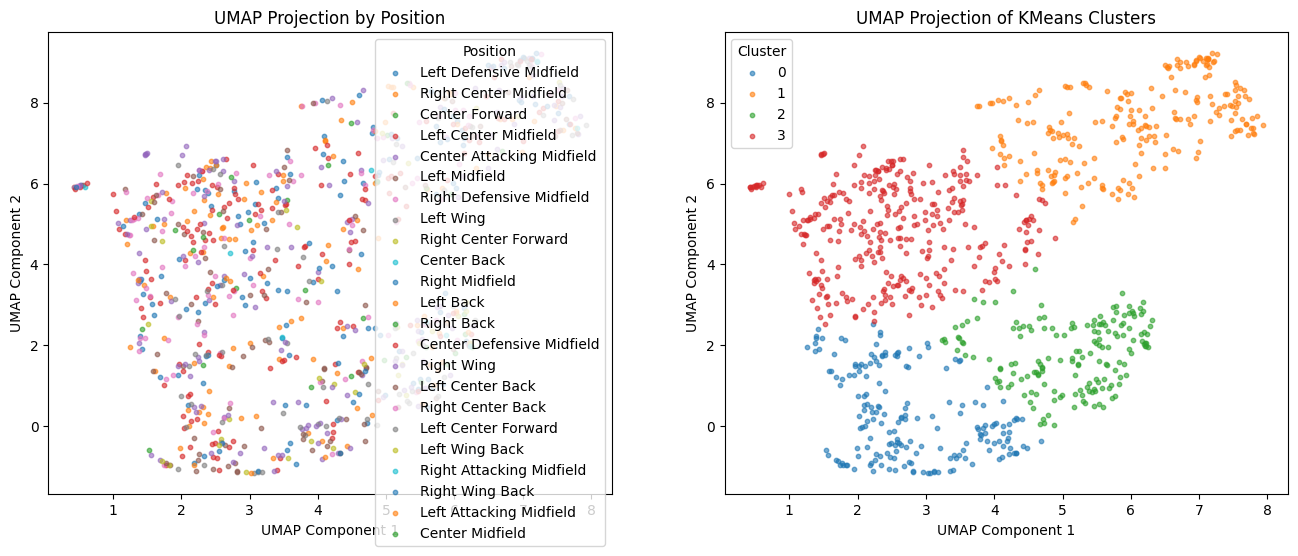

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: UMAP by position
unique_positions = y.unique()
palette = sns.color_palette("tab10", n_colors=len(unique_positions))
position_to_color = {pos: palette[i] for i, pos in enumerate(unique_positions)}

for pos in unique_positions:
    mask = y == pos
    axes[0].scatter(
        umap_2d_features[mask, 0],
        umap_2d_features[mask, 1],
        s=10,
        alpha=0.6,
        label=pos,
        color=position_to_color[pos]
    )
axes[0].set_title('UMAP Projection by Position')
axes[0].set_xlabel('UMAP Component 1')
axes[0].set_ylabel('UMAP Component 2')
axes[0].legend(title="Position")

# Right: UMAP by KMeans cluster
unique_clusters = np.unique(y_pred)
palette_clusters = sns.color_palette("tab10", n_colors=len(unique_clusters))
cluster_to_color = {c: palette_clusters[i] for i, c in enumerate(unique_clusters)}

for c in unique_clusters:
    mask = y_pred == c
    axes[1].scatter(
        umap_2d_features[mask, 0],
        umap_2d_features[mask, 1],
        s=10,
        alpha=0.6,
        label=c,
        color=cluster_to_color[c]
    )
axes[1].set_title('UMAP Projection of KMeans Clusters')
axes[1].set_xlabel('UMAP Component 1')
axes[1].set_ylabel('UMAP Component 2')
axes[1].legend(title="Cluster")

#plt.tight_layout()
plt.show()


# level 1 position - Sub-Position

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

def train_evaluate_model(X, y, model, scale=True, test_size=0.2, random_state=42):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Optional scaling
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation
    return classification_report(y_test, y_pred, output_dict=True, zero_division=0)


def evaluate_multiple_models(X, y_encoded, label_encoder, scale=True):
    models = {
        "Logistic Regression": LogisticRegression(penalty="l1", solver="liblinear", C=1),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
        "SVM (poly kernel)": SVC(kernel='poly', random_state=42, gamma='auto'),
        "Gradient Boosting": GradientBoostingClassifier(),
    }

    results_all = {}

    for name, model in models.items():
        print(f"Training and evaluating: {name}")
        raw_results = train_evaluate_model(X, y_encoded, model, scale=scale)

        # Convert digit keys back to original class names
        label_map = dict(zip(map(str, range(len(label_encoder.classes_))), label_encoder.classes_))
        readable_results = {
            label_map[k] if k.isdigit() else k: v
            for k, v in raw_results.items()
        }

        results_all[name] = readable_results

    return results_all


# ---- Usage ----
# Assume df_heatmap is already defined
X = df_heatmap.drop(columns=["new_position", "role","position_level_1"])
y = df_heatmap["position_level_1"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Run and collect results (original features)
all_results = evaluate_multiple_models(X, y_encoded, le, scale=True)

# Print out accuracy of each model
for model_name, metrics in all_results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    for label in le.classes_:
        if label in metrics:
            print(f"  {label} - Precision: {metrics[label]['precision']:.2f}, "
                  f"Recall: {metrics[label]['recall']:.2f}, F1: {metrics[label]['f1-score']:.2f}")



Training and evaluating: Logistic Regression
Training and evaluating: Random Forest
Training and evaluating: MLP Classifier
Training and evaluating: SVM (poly kernel)
Training and evaluating: Gradient Boosting

Model: Logistic Regression
Accuracy: 0.4554
  Central Midfielder - Precision: 0.32, Recall: 0.68, F1: 0.43
  Defensive Midfielder - Precision: 0.29, Recall: 0.13, F1: 0.18
  Goalkeeper - Precision: 0.94, Recall: 1.00, F1: 0.97
  Offensive Defender - Precision: 0.51, Recall: 0.68, F1: 0.59
  Offensive Midfielder - Precision: 0.00, Recall: 0.00, F1: 0.00
  Regular Defender - Precision: 0.68, Recall: 0.69, F1: 0.68
  Striker - Precision: 0.47, Recall: 0.22, F1: 0.29
  Winger - Precision: 0.00, Recall: 0.00, F1: 0.00

Model: Random Forest
Accuracy: 0.4213
  Central Midfielder - Precision: 0.32, Recall: 0.53, F1: 0.40
  Defensive Midfielder - Precision: 0.26, Recall: 0.13, F1: 0.17
  Goalkeeper - Precision: 0.94, Recall: 1.00, F1: 0.97
  Offensive Defender - Precision: 0.46, Recall: 

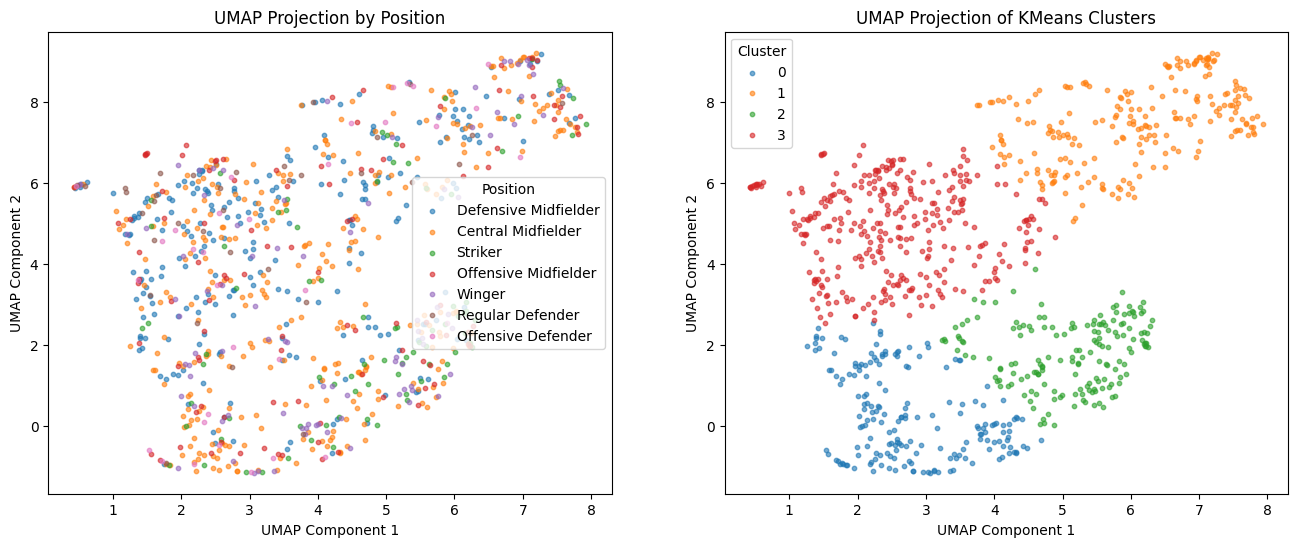

In [164]:
from sklearn.cluster import KMeans
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Transform features to 2D using UMAP
umap_transformer = UMAP(n_components=2, init='random', random_state=42)
umap_2d_features:np.ndarray = umap_transformer.fit_transform(X)
umap_2d_features

# 2. Fit and predict with KMeans clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  
y_pred = kmeans.fit_predict(umap_2d_features)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: UMAP by position
unique_positions = y.unique()
palette = sns.color_palette("tab10", n_colors=len(unique_positions))
position_to_color = {pos: palette[i] for i, pos in enumerate(unique_positions)}

for pos in unique_positions:
    mask = y == pos
    axes[0].scatter(
        umap_2d_features[mask, 0],
        umap_2d_features[mask, 1],
        s=10,
        alpha=0.6,
        label=pos,
        color=position_to_color[pos]
    )
axes[0].set_title('UMAP Projection by Position')
axes[0].set_xlabel('UMAP Component 1')
axes[0].set_ylabel('UMAP Component 2')
axes[0].legend(title="Position")

# Right: UMAP by KMeans cluster
unique_clusters = np.unique(y_pred)
palette_clusters = sns.color_palette("tab10", n_colors=len(unique_clusters))
cluster_to_color = {c: palette_clusters[i] for i, c in enumerate(unique_clusters)}

for c in unique_clusters:
    mask = y_pred == c
    axes[1].scatter(
        umap_2d_features[mask, 0],
        umap_2d_features[mask, 1],
        s=10,
        alpha=0.6,
        label=c,
        color=cluster_to_color[c]
    )
axes[1].set_title('UMAP Projection of KMeans Clusters')
axes[1].set_xlabel('UMAP Component 1')
axes[1].set_ylabel('UMAP Component 2')
axes[1].legend(title="Cluster")

#plt.tight_layout()
plt.show()

# Plot Heatmap

In [9]:
# df.loc[df["player"]==player,:]
standard_stats = pd.read_csv("../../data/new_approach/standard_stats_all_test.csv").loc[:,["player","player", "player_id","new_position","role"]]
standard_stats = standard_stats.set_index("player_id")


# Leonardo Bonucci, Jérôme Boateng

In [60]:
df["type"].unique()


['Pass', 'Carry']
Categories (33, object): ['50/50', 'Bad Behaviour', 'Ball Receipt*', 'Ball Recovery', ..., 'Shot', 'Starting XI', 'Substitution', 'Tactical Shift']

In [ ]:
df

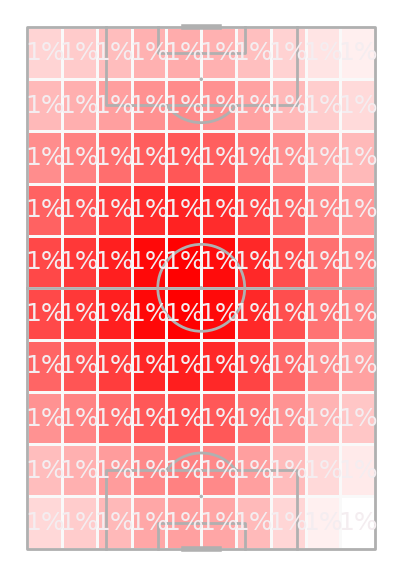

In [66]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

player = "Xabier Alonso Olano"
player_a = df.loc[df["player"]==player,:]


# Create a custom colormap starting from white to red
cmap = LinearSegmentedColormap.from_list("white_to_red", ["#ffffff", "#ff0000"])
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.125, 6))

# Bin the player stats and normalize them
bin_statistic = pitch.bin_statistic(player_a["x"], player_a["y"], statistic='count', bins=(10,10), normalize=True)
# bin_statistic["statistic"] = np.where(bin_statistic["statistic"] < 0.1, 0, bin_statistic["statistic"])
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], sigma=3)


pitch.heatmap(bin_statistic, ax=ax, cmap=cmap, edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}')


In [ ]:
# define pitch for heatmap
pitch = VerticalPitch(positional=True, positional_color='#eadddd', shade_color='#f2f2f2')
# fig, ax = pitch.draw()
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))

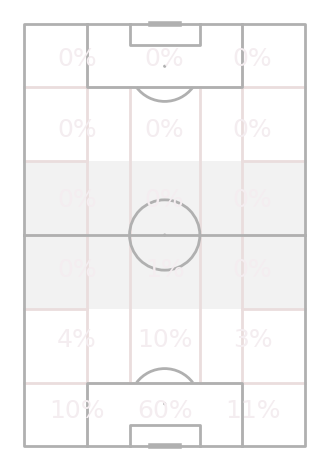

In [78]:
pitch = VerticalPitch(positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2')
fig, ax = pitch.draw()
bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))
bin_statistic = pitch.bin_statistic(player_a["x"], player_a["y"], statistic='count',
                                    bins=(bin_x, bin_y), normalize=True)

labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}')


In [82]:
bin_statistic["statistic"].flatten()

array([0.        , 0.00052659, 0.00210637, 0.00210637, 0.00842549,
       0.00789889, 0.00526593, 0.00631912, 0.00842549, 0.01000527,
       0.00052659, 0.00105319, 0.00263296, 0.01000527, 0.00368615,
       0.01421801, 0.01053186, 0.01369142, 0.01579779, 0.00842549,
       0.00052659, 0.        , 0.00263296, 0.00210637, 0.00895208,
       0.00842549, 0.01579779, 0.00895208, 0.01053186, 0.00684571,
       0.00157978, 0.00210637, 0.        , 0.00421274, 0.01316482,
       0.01316482, 0.0073723 , 0.01579779, 0.01895735, 0.02317009,
       0.00210637, 0.00368615, 0.00157978, 0.00210637, 0.00842549,
       0.01316482, 0.0226435 , 0.01790416, 0.01632438, 0.01843075,
       0.        , 0.00421274, 0.00526593, 0.00631912, 0.01211164,
       0.01843075, 0.03896788, 0.03475513, 0.02790943, 0.0147446 ,
       0.00526593, 0.00421274, 0.00842549, 0.0221169 , 0.01421801,
       0.04949974, 0.03896788, 0.02843602, 0.01579779, 0.00789889,
       0.00579252, 0.01263823, 0.01579779, 0.03844128, 0.03317

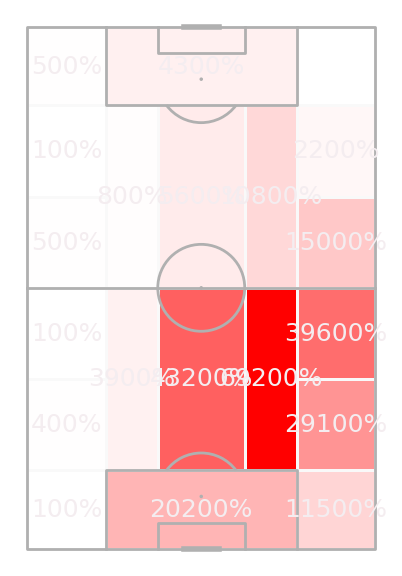

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

player = "Fabian Lukas Schär"
player_a = df.loc[df["player"]==player,:]


# Create a custom colormap starting from white to red
cmap = LinearSegmentedColormap.from_list("white_to_red", ["#ffffff", "#ff0000"])
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.125, 6))

# Bin the player stats and normalize them
bin_statistic = pitch.bin_statistic_positional(player_a["x"], player_a["y"], statistic='count', positional="full", normalize=True)


pitch.heatmap_positional(bin_statistic, ax=ax, cmap=cmap, edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}',exclude_zeros=True)


In [50]:
bin_statistic

[{'statistic': array([[0.00038895, 0.00155581, 0.00038895, 0.00194477, 0.00038895,
          0.00194477]]),
  'x_grid': array([[  0.,  18.,  39.,  60.,  81., 102., 120.],
         [  0.,  18.,  39.,  60.,  81., 102., 120.]]),
  'y_grid': array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [18., 18., 18., 18., 18., 18., 18.]]),
  'cx': array([  9. ,  28.5,  49.5,  70.5,  91.5, 111. ]),
  'cy': array([9., 9., 9., 9., 9., 9.]),
  'binnumber': None,
  'inside': None,
  'angle_grid': None,
  'angle_widths': None},
 {'statistic': array([[0.04472968, 0.11318553, 0.15402567, 0.05834306, 0.00855698,
          0.        ]]),
  'x_grid': array([[  0.,  18.,  39.,  60.,  81., 102., 120.],
         [  0.,  18.,  39.,  60.,  81., 102., 120.]]),
  'y_grid': array([[62., 62., 62., 62., 62., 62., 62.],
         [80., 80., 80., 80., 80., 80., 80.]]),
  'cx': array([  9. ,  28.5,  49.5,  70.5,  91.5, 111. ]),
  'cy': array([71., 71., 71., 71., 71., 71.]),
  'binnumber': None,
  'inside': None,
  'angle_

# Tests

<Axes: xlabel='x', ylabel='y'>

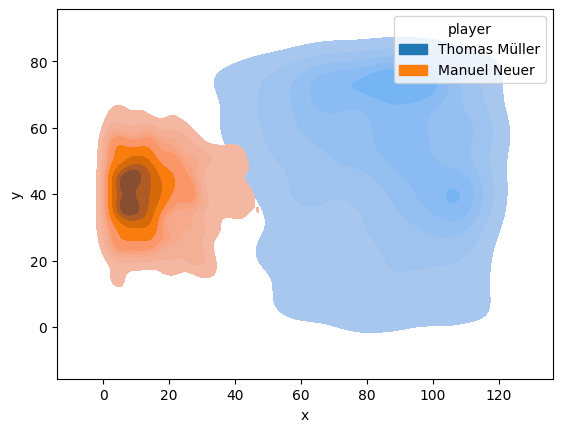

In [2]:
import seaborn as sns

player_1 = df.loc[(df["player"]=="Manuel Neuer") | (df["player"]=="Thomas Müller") ,:]
player_1
sns.kdeplot(data=player_1, x="x", y="y",  hue="player", fill=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data
#data = np.random.normal(size=100)
data = np.stack([player_1["x"], player_1["y"]]).T
# Create a gaussian KDE object
kde = gaussian_kde(data)

# Define a grid where you want to evaluate the KDE
x_grid = np.linspace(min(data), max(data), 100)

# Evaluate the KDE on the grid
kde_values = kde.evaluate(x_grid)

# Plot the result using matplotlib
plt.plot(x_grid, kde_values, label='KDE')
plt.fill_between(x_grid, kde_values, alpha=0.5)  # Optional: Fill under the curve
plt.title('Kernel Density Estimate')
plt.xlabel('Data Points')
plt.ylabel('Density')
plt.legend()
plt.show()


ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

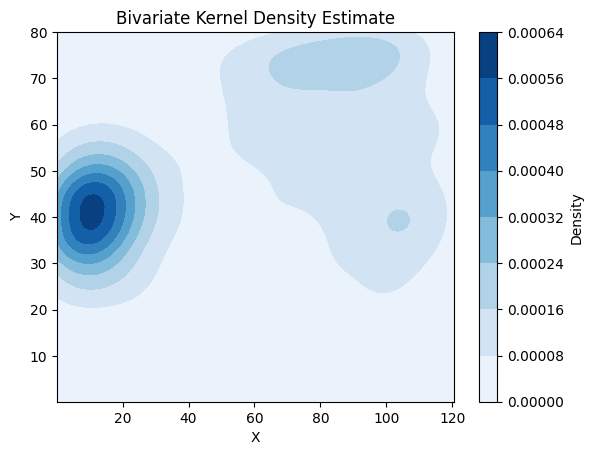

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data (replace with your dataframe)
data = np.stack([player_1["x"], player_1["y"]]).T

# Create a gaussian KDE object
kde = gaussian_kde(data.T)  # Transpose the data for bivariate kde

# Define a grid to evaluate the KDE
x_grid = np.linspace(min(df["x"]), max(df["x"]), 100)
y_grid = np.linspace(min(df["y"]), max(df["y"]), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Evaluate the KDE on the grid (reshaping the meshgrid for evaluation)
grid_points = np.vstack([X.ravel(), Y.ravel()])
kde_values = kde(grid_points).reshape(X.shape)

# Plot the result using contour plot for bivariate KDE
plt.contourf(X, Y, kde_values, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Bivariate Kernel Density Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
